## Rented Bikes Data Preparation 

#### Import some helper Packages

In [2480]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from datetime import datetime as dt
import os 
import missingno as msno
from IPython.display import Image
import random

In [2481]:
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

In [2482]:
warnings.filterwarnings('ignore')

In [2483]:
%matplotlib inline

In [2484]:
sns.set_theme(context = 'notebook' , style = 'darkgrid' , palette = 'flare' , font_scale = 1.1,
             rc = {'figure.figsize' : (5,5)})

###### Read dataset

In [2485]:
df = pd.read_csv('bikes_mod.csv')
df.head(2)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,275.028767


In [2486]:
df.shape

(10886, 12)

In [2487]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  Profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


<AxesSubplot:>

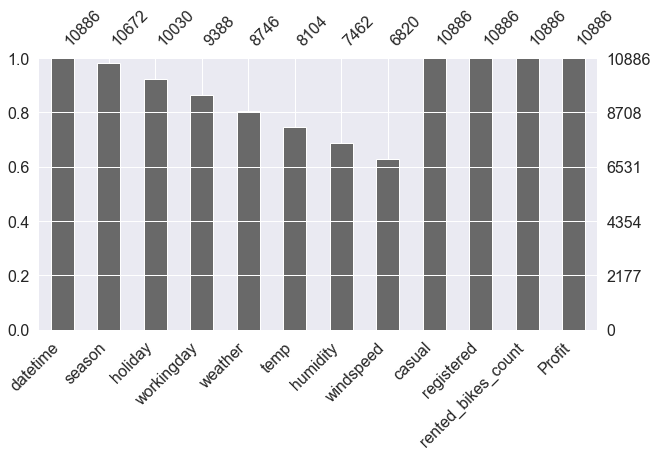

In [2488]:
msno.bar(df , figsize = (10,5))

In [2489]:
df.isnull().mean()*100

datetime               0.000000
season                 1.965828
holiday                7.863311
workingday            13.760794
weather               19.658277
temp                  25.555760
humidity              31.453243
windspeed             37.350726
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
Profit                 0.000000
dtype: float64

In [2490]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767


###### How do we benefit from Datetime Feature :

In [2491]:
df['datetime'].dtype # datetime is object(string) as data type !! convert to datetime 

dtype('O')

In [2492]:
df['datetime'] = pd.to_datetime(df['datetime'] , errors = 'coerce')

In [2493]:
df['datetime'].dtype

dtype('<M8[ns]')

###### We can cxtract from it Year , month name , day name , hours , etc ...

In [2494]:
df['Day'] = df['datetime'].dt.day_name()

In [2495]:
df['Month'] = df['datetime'].dt.month_name()

In [2496]:
df['Year'] = df['datetime'].dt.year

In [2497]:
df['Hours'] = df['datetime'].dt.hour

###### Now Drop datetime columns 

In [2498]:
df.drop(['datetime'] , axis = 1 , inplace = True)

In [2499]:
df.head(2)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,Day,Month,Year,Hours
0,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,Saturday,January,2011,0
1,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,275.028767,Saturday,January,2011,1


###### We can extract day period from hours :

In [2500]:
def GetDayPeriod(x):
    if x in range(0, 13):
        return 'morning'
    elif x in range(13, 19):
        return 'afternoon'
    else:
        return 'evening'

In [2501]:
df['DayPeriod'] = df['Hours'].apply(GetDayPeriod)

###### Drop Hours columns we don't need it right now 

In [2502]:
df.drop(['Hours'] , axis = 1 , inplace = True)

In [2503]:
df.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,Day,Month,Year,DayPeriod
0,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,Saturday,January,2011,morning
1,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40,275.028767,Saturday,January,2011,morning
2,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32,201.928767,Saturday,January,2011,morning
3,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13,94.428767,Saturday,January,2011,morning
4,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,Saturday,January,2011,morning


###### holiday , working day with unlogical values we can delete holiday , working day column 

In [2504]:
df.drop(['holiday' , 'workingday'] , axis = 1 , inplace = True)

In [2505]:
df = df[df.select_dtypes('object_').columns.append( df.select_dtypes('number').columns)]

<AxesSubplot:>

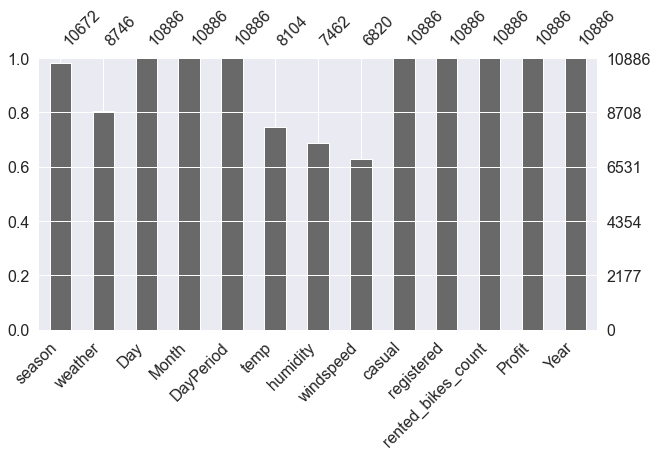

In [2506]:
msno.bar(df , figsize=(10,5))

###### split Data into Train & Test : 

In [2507]:
x = df.drop(['Profit'] , axis = 1)
y = df['Profit']

In [2508]:
x_train , x_test , y_train , y_test = train_test_split(x , y 
                                                       , test_size = 0.20 , random_state = 7)

In [2509]:
x_train.reset_index(inplace = True , drop = True)
x_test.reset_index(inplace = True , drop = True)
y_train.reset_index(inplace = True , drop = True)
y_test.reset_index(inplace = True , drop = True)

In [2510]:
x_train.head(3)

,season,weather,Day,Month,DayPeriod,temp,humidity,windspeed,casual,registered,rented_bikes_count,Year
0,Winter,Clear,Wednesday,December,evening,12.30,NaN,26.0027,5,69,74,2012
1,Winter,Clear,Thursday,November,morning,13.12,66.0,8.9981,10,10,20,2012
2,Summer,Clear,Thursday,April,morning,17.22,41.0,19.9995,0,5,5,2012


<AxesSubplot:>

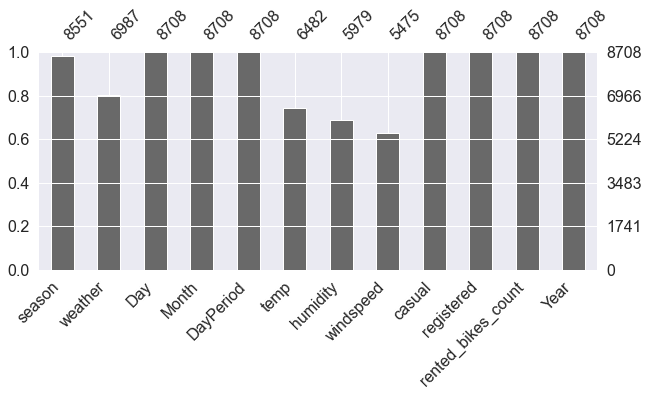

In [2511]:
msno.bar(x_train , figsize = (10 , 4))

In [2512]:
x_train['Profit'] = y_train
x_test['Profit'] = y_test

In [2513]:
x_train.isnull().mean()*100

season                 1.802940
weather               19.763436
Day                    0.000000
Month                  0.000000
DayPeriod              0.000000
temp                  25.562701
humidity              31.338999
windspeed             37.126780
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
Year                   0.000000
Profit                 0.000000
dtype: float64

In [2514]:
x_test.isnull().mean()*100

season                 2.617080
weather               19.237833
Day                    0.000000
Month                  0.000000
DayPeriod              0.000000
temp                  25.528007
humidity              31.910009
windspeed             38.246097
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
Year                   0.000000
Profit                 0.000000
dtype: float64

In [2515]:
x_train.dropna(subset = ['season'] , axis = 0 , inplace = True)

In [2516]:
x_test.dropna(subset = ['season'] , axis = 0 , inplace = True)

In [2517]:
x_train.reset_index(inplace = True , drop = True)

In [2518]:
x_test.reset_index(inplace = True , drop = True)

In [2519]:
x_train_cat = x_train.select_dtypes('object_')
x_train_num = x_train.select_dtypes('number')

In [2520]:
x_test_cat = x_test.select_dtypes('object_')
x_test_num = x_test.select_dtypes('number')

In [2521]:
x_train_cat.isnull().mean()*100

season        0.000000
weather      19.716992
Day           0.000000
Month         0.000000
DayPeriod     0.000000
dtype: float64

In [2522]:
x_test_cat.isnull().mean()*100

season        0.000000
weather      19.189062
Day           0.000000
Month         0.000000
DayPeriod     0.000000
dtype: float64

###### Using ffill method to fill null values in weather we cant use mode (most_frequent) because data is sorted with date and time that make fill with mode is unlogical

In [2523]:
x_train_cat['weather'].fillna(method = 'ffill' , inplace = True)

In [2524]:
x_test_cat['weather'].fillna(method = 'ffill' , inplace = True)

In [2525]:
x_train_cat.isnull().mean()

season       0.0
weather      0.0
Day          0.0
Month        0.0
DayPeriod    0.0
dtype: float64

In [2526]:
x_test_cat.isnull().mean()

season       0.0
weather      0.0
Day          0.0
Month        0.0
DayPeriod    0.0
dtype: float64

In [2527]:
x_train_num.isnull().mean()*100

temp                  25.575956
humidity              31.516782
windspeed             37.059993
casual                 0.000000
registered             0.000000
rented_bikes_count     0.000000
Year                   0.000000
Profit                 0.000000
dtype: float64

In [2528]:
x_train.reset_index(inplace = True , drop = True)

In [2529]:
x_test.reset_index(drop = True , inplace = True)

###### Detect Outlier Points :

In [2530]:
def Detect_Outlier(data , col):
    des = data[col].describe()
    IQR = des['75%'] - des['25%']
    minw , maxw = des['25%'] - (1.5 * IQR) , des['75%'] + (1.5 * IQR)
    otlir = data[(data[col] < minw) | (data[col] > maxw)].index
    return otlir

###### Make new tmp dataframe from x_train_num to fill missing values with median or mean and compare with KNN Imputer

In [2531]:
tmp_num = x_train_num.copy()

In [2532]:
for col in tmp_num.columns:
    print(f'{col} with ( {len(Detect_Outlier(tmp_num , col))} ) outlier point'.title())

Temp With ( 0 ) Outlier Point
Humidity With ( 13 ) Outlier Point
Windspeed With ( 104 ) Outlier Point
Casual With ( 589 ) Outlier Point
Registered With ( 334 ) Outlier Point
Rented_Bikes_Count With ( 232 ) Outlier Point
Year With ( 0 ) Outlier Point
Profit With ( 313 ) Outlier Point


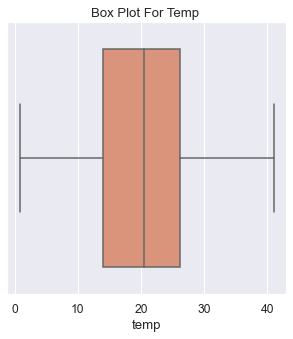

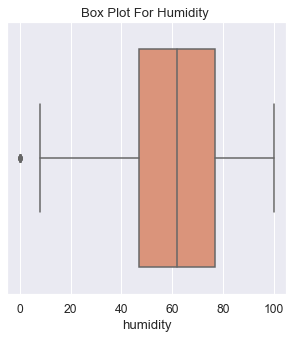

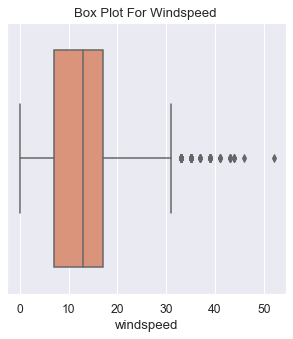

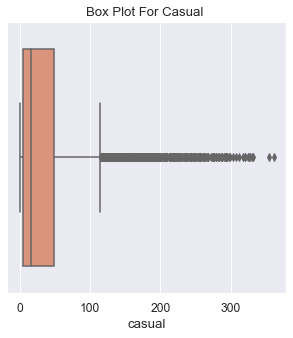

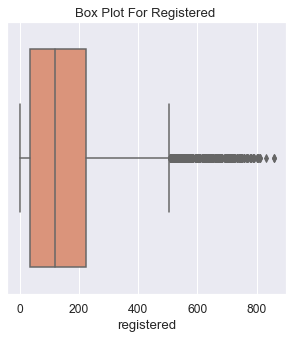

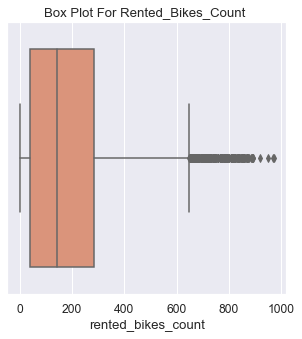

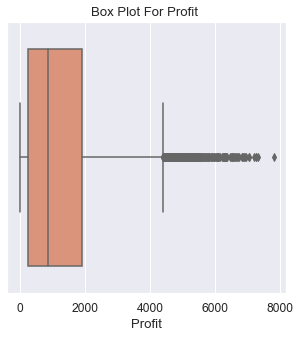

In [2533]:
for col in tmp_num.drop(['Year'] , axis = 1 ).columns:
    plt.figure()
    plt.title(f'box plot for {col} '.title())
    sns.boxplot(data = tmp_num , x = col)

###### Based on most of feature has outlier try fill missing value with median :

In [2534]:
for col in tmp_num.drop(['Year'] , axis = 1).columns:
    null_idx = tmp_num[tmp_num[col].isnull()].index
    tmp_num[col].loc[null_idx] = tmp_num[col].median()

In [2535]:
for col in tmp_num.columns:
    print(f'{col} with ( {len(Detect_Outlier(tmp_num , col))} ) outlier point'.title())

Temp With ( 42 ) Outlier Point
Humidity With ( 325 ) Outlier Point
Windspeed With ( 412 ) Outlier Point
Casual With ( 589 ) Outlier Point
Registered With ( 334 ) Outlier Point
Rented_Bikes_Count With ( 232 ) Outlier Point
Year With ( 0 ) Outlier Point
Profit With ( 313 ) Outlier Point


###### Fill missing with median cause increasing in outlier points   !!!!!

###### Using KNN imputer to fill missing values in numerical columns 

In [2536]:
knn_imputer = KNNImputer()

In [2537]:
x_train_num = pd.DataFrame(data = knn_imputer.fit_transform(x_train_num)
             , columns = knn_imputer.get_feature_names_out())

In [2538]:
for col in x_train_num.columns:
    print(f'{col} with ( {len(Detect_Outlier(x_train_num , col))} ) outlier point'.title())

Temp With ( 0 ) Outlier Point
Humidity With ( 15 ) Outlier Point
Windspeed With ( 200 ) Outlier Point
Casual With ( 589 ) Outlier Point
Registered With ( 334 ) Outlier Point
Rented_Bikes_Count With ( 232 ) Outlier Point
Year With ( 0 ) Outlier Point
Profit With ( 313 ) Outlier Point


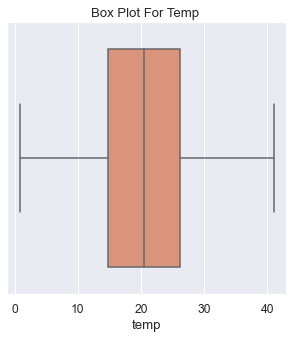

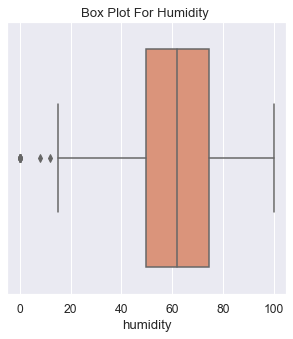

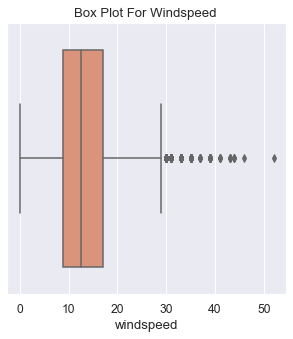

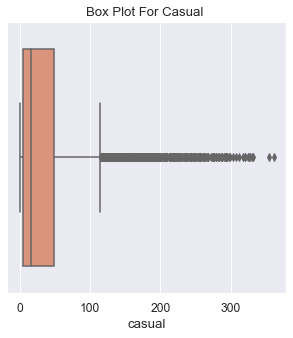

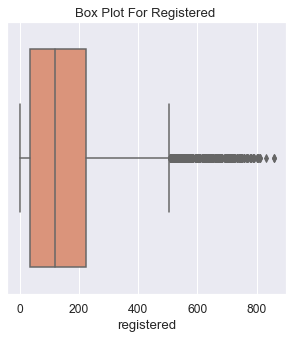

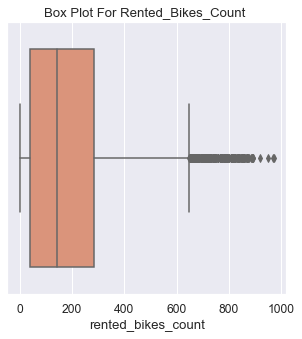

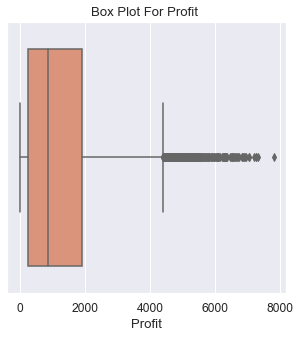

In [2539]:
for col in x_train_num.drop(['Year'] , axis = 1 ).columns:
    plt.figure()
    plt.title(f'box plot for {col} '.title())
    sns.boxplot(data = x_train_num , x = col)

#### Comparing outlier point between median and knn to fill missing values :
###### Using KNN Imputer :
* Temp With ( 0 ) Outlier Point
* Humidity With ( 15 ) Outlier Point
* Windspeed With ( 200 ) Outlier Point

###### Using median :
* Temp With ( 42 ) Outlier Point
* Humidity With ( 325 ) Outlier Point
* Windspeed With ( 412 ) Outlier Point


###### AS we see fill missing with KNN Imputer is better than median so use it in x_test too 

In [2540]:
knn_imputer = KNNImputer()

In [2541]:
x_test_num = pd.DataFrame(data = knn_imputer.fit_transform(x_test_num) , 
                         columns = knn_imputer.get_feature_names_out())

In [2542]:
x_train_num.isnull().mean()*100

temp                  0.0
humidity              0.0
windspeed             0.0
casual                0.0
registered            0.0
rented_bikes_count    0.0
Year                  0.0
Profit                0.0
dtype: float64

In [2543]:
x_test_num.isnull().mean()*100

temp                  0.0
humidity              0.0
windspeed             0.0
casual                0.0
registered            0.0
rented_bikes_count    0.0
Year                  0.0
Profit                0.0
dtype: float64

### Encode Categorical columns X_train & X_test: 

###### Encode Season Feature Using OneHotEncoder :

In [2544]:
x_train_cat.head()

,season,weather,Day,Month,DayPeriod
0,Winter,Clear,Wednesday,December,evening
1,Winter,Clear,Thursday,November,morning
2,Summer,Clear,Thursday,April,morning
3,Spring,Clear,Wednesday,March,evening
4,Winter,Clear,Saturday,October,evening


In [2545]:
ohe = OneHotEncoder(sparse = False , drop = 'first')

In [2546]:
x_train_cat = pd.concat([x_train_cat , pd.DataFrame(ohe.fit_transform(x_train_cat[['season']]) ,
                                                    columns = ohe.get_feature_names_out())] , axis = 1)

In [2547]:
x_train_cat.drop(['season'] , axis = 1 , inplace = True)

In [2548]:
x_train_cat.head(3)

,weather,Day,Month,DayPeriod,season_Spring,season_Summer,season_Winter
0,Clear,Wednesday,December,evening,0.0,0.0,1.0
1,Clear,Thursday,November,morning,0.0,0.0,1.0
2,Clear,Thursday,April,morning,0.0,1.0,0.0


In [2549]:
ohe = OneHotEncoder(sparse = False , drop = 'first')

In [2550]:
x_test_cat = pd.concat([x_test_cat , pd.DataFrame(ohe.fit_transform(x_test_cat[['season']]) 
                                                  , columns = ohe.get_feature_names_out())] , axis = 1)

In [2551]:
x_test_cat.drop(['season'] , axis = 1 , inplace = True)

In [2552]:
x_test_cat.head(3)

,weather,Day,Month,DayPeriod,season_Spring,season_Summer,season_Winter
0,Clear,Monday,August,evening,0.0,0.0,0.0
1,Clear,Tuesday,March,morning,1.0,0.0,0.0
2,Clear,Monday,August,evening,0.0,0.0,0.0


###### Encode weather Feature using OneHotEncoder :

In [2553]:
x_train_cat['weather'].unique()

array(['Clear', 'Mist', 'Rainy', 'Snowy'], dtype=object)

In [2554]:
one = OneHotEncoder(sparse = False , drop = 'first')

In [2555]:
x_train_cat = pd.concat([x_train_cat , pd.DataFrame( ohe.fit_transform(x_train_cat[['weather']]) 
                                                    , columns = ohe.get_feature_names_out())] , axis = 1)

In [2556]:
x_train_cat.drop(['weather'] , axis = 1 , inplace = True)

In [2557]:
x_train_cat.head(2)

,Day,Month,DayPeriod,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy
0,Wednesday,December,evening,0.0,0.0,1.0,0.0,0.0,0.0
1,Thursday,November,morning,0.0,0.0,1.0,0.0,0.0,0.0


In [2558]:
ohe = OneHotEncoder(sparse = False , drop = 'first')

In [2559]:
x_test_cat = pd.concat([x_test_cat , pd.DataFrame( ohe.fit_transform(x_test_cat[['weather']]) ,
                                                  columns = ohe.get_feature_names_out() )] , axis = 1)

In [2560]:
x_test_cat.drop(['weather'] , axis = 1 , inplace = True)

In [2561]:
x_test_cat.head(3)

,Day,Month,DayPeriod,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy
0,Monday,August,evening,0.0,0.0,0.0,0.0,0.0
1,Tuesday,March,morning,1.0,0.0,0.0,0.0,0.0
2,Monday,August,evening,0.0,0.0,0.0,0.0,0.0


###### Encode Day Feature using Binary Encoder : 

In [2562]:
be = BinaryEncoder()

In [2563]:
x_train_cat = pd.concat([x_train_cat , be.fit_transform(x_train_cat[['Day']])] , axis = 1)

In [2564]:
x_train_cat.drop(['Day'] , inplace = True , axis = 1)

In [2565]:
x_train_cat.head(3)

,Month,DayPeriod,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,Day_0,Day_1,Day_2
0,December,evening,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1
1,November,morning,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0
2,April,morning,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0


In [2566]:
be = BinaryEncoder()

In [2567]:
x_test_cat = pd.concat([x_test_cat , be.fit_transform(x_test_cat[['Day']])] , axis = 1)

In [2568]:
x_test_cat.drop(['Day'] , inplace = True , axis = 1)

In [2569]:
x_test_cat.head(3)

,Month,DayPeriod,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,Day_0,Day_1,Day_2
0,August,evening,0.0,0.0,0.0,0.0,0.0,0,0,1
1,March,morning,1.0,0.0,0.0,0.0,0.0,0,1,0
2,August,evening,0.0,0.0,0.0,0.0,0.0,0,0,1


###### Encode Month using Binary Encoder : 

In [2570]:
x_train_cat['Month'].nunique()

12

In [2571]:
be = BinaryEncoder()

In [2572]:
x_train_cat = pd.concat([x_train_cat , be.fit_transform(x_train_cat[['Month']])] , axis = 1)

In [2573]:
x_train_cat.drop(['Month'] , axis = 1 , inplace = True)

In [2574]:
x_train_cat.head(3)

,DayPeriod,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,Day_0,Day_1,Day_2,Month_0,Month_1,Month_2,Month_3
0,evening,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,morning,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0
2,morning,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1


In [2575]:
be = BinaryEncoder()

In [2576]:
x_test_cat = pd.concat([x_test_cat , be.fit_transform(x_test_cat[['Month']])] , axis = 1)

In [2577]:
x_test_cat.drop(['Month'] , axis = 1 , inplace = True)

In [2578]:
x_test_cat.head(3)

,DayPeriod,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,Day_0,Day_1,Day_2,Month_0,Month_1,Month_2,Month_3
0,evening,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,morning,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
2,evening,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1


###### Encode DayPeriod Feature using OneHotEncoder :

In [2579]:
ohe = OneHotEncoder(sparse = False , drop = 'first')

In [2580]:
x_train_cat = pd.concat([x_train_cat , pd.DataFrame(ohe.fit_transform(x_train_cat[['DayPeriod']]) , 
                                     columns = ohe.get_feature_names_out())] , axis = 1)

In [2581]:
x_train_cat.drop(['DayPeriod'] , inplace = True , axis = 1 )

In [2582]:
x_train_cat.head(3)

,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,Day_0,Day_1,Day_2,Month_0,Month_1,Month_2,Month_3,DayPeriod_evening,DayPeriod_morning
0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0.0,1.0


In [2583]:
ohe = OneHotEncoder(sparse = False , drop = 'first')

In [2584]:
x_test_cat = pd.concat([x_test_cat , pd.DataFrame(ohe.fit_transform(x_test_cat[['DayPeriod']]) , 
                                     columns = ohe.get_feature_names_out())] , axis = 1)

In [2585]:
x_test_cat.drop(['DayPeriod'] , inplace = True , axis = 1 )

In [2586]:
x_test_cat.head(3)

,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,Day_0,Day_1,Day_2,Month_0,Month_1,Month_2,Month_3,DayPeriod_evening,DayPeriod_morning
0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1.0,0.0


### Dealing with outlier points in numerical Feature :

In [2587]:
def Detect_Outlier(data , col):
    des = data[col].describe()
    IQR = des['75%'] - des['25%']
    minw , maxw = des['25%'] - (1.5*IQR),des['75%'] + (1.5*IQR)
    otlir = data[(data[col] > maxw) | (data[col] < minw)].index
    return otlir

In [2588]:
x_train_num.columns

Index(['temp', 'humidity', 'windspeed', 'casual', 'registered',
       'rented_bikes_count', 'Year', 'Profit'],
      dtype='object')

###### Temprature :

In [2589]:
Detect_Outlier(x_train_num , 'temp')

Int64Index([], dtype='int64')

<AxesSubplot:xlabel='temp'>

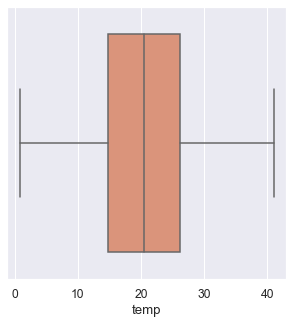

In [2590]:
sns.boxplot(data = x_train_num , x = 'temp')

###### Humidity :

In [2591]:
otlier_idx = Detect_Outlier(x_train_num,'humidity')
len(otlier_idx)

15

<AxesSubplot:xlabel='humidity'>

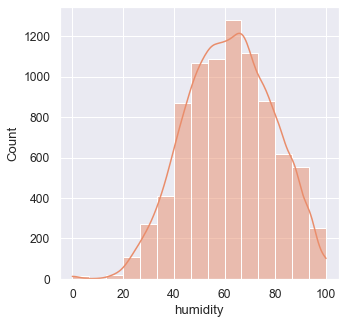

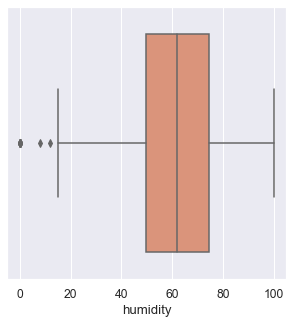

In [2592]:
sns.histplot(x_train_num['humidity'] , bins = 15 , kde = True)
plt.figure()
sns.boxplot(data = x_train_num , x = 'humidity')

In [2593]:
x_train_num['humidity'].loc[otlier_idx] = x_train_num['humidity'].median()

<AxesSubplot:xlabel='humidity'>

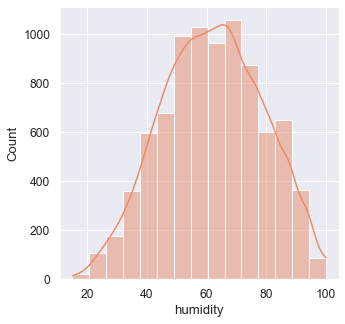

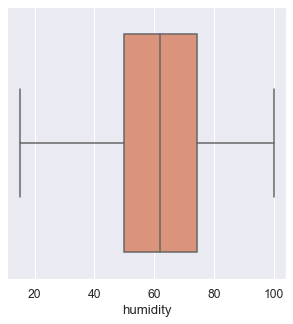

In [2594]:
sns.histplot(x_train_num['humidity'] , bins = 15 , kde = True)
plt.figure()
sns.boxplot(data = x_train_num , x = 'humidity')

###### windspeed :

In [2595]:
Image(url="wind.PNG", width=500, height=100)

In [2596]:
otlir_idx = Detect_Outlier(x_train_num , 'windspeed')
len(otlir_idx)

200

<AxesSubplot:xlabel='windspeed'>

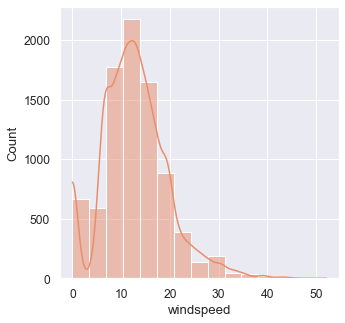

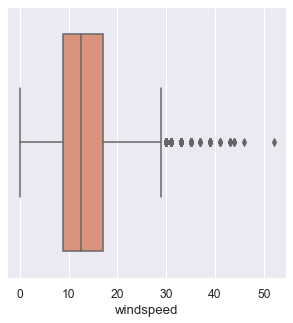

In [2597]:
sns.histplot(x_train_num['windspeed'] , bins = 15 , kde = True)
plt.figure()
sns.boxplot(data = x_train_num , x = 'windspeed')

In [2598]:
x_train_num['windspeed'].loc[otlir_idx] = x_train_num['windspeed'].median()

<AxesSubplot:xlabel='windspeed'>

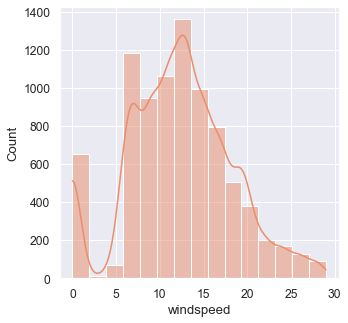

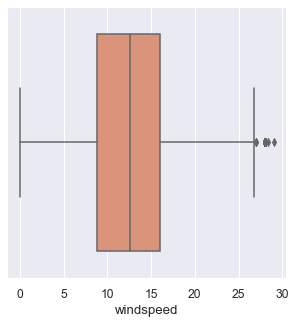

In [2599]:
sns.histplot(x_train_num['windspeed'] , bins = 15 , kde = True)
plt.figure()
sns.boxplot(data = x_train_num , x = 'windspeed')

In [2600]:
len(Detect_Outlier(x_train_num , 'windspeed'))

94

###### casual:

In [2601]:
des = x_train_num['casual'].describe().to_frame().T
des

,count,mean,std,min,25%,50%,75%,max
casual,8551.0,35.480295,48.991223,0.0,4.0,16.0,48.0,361.0


<AxesSubplot:xlabel='casual', ylabel='Density'>

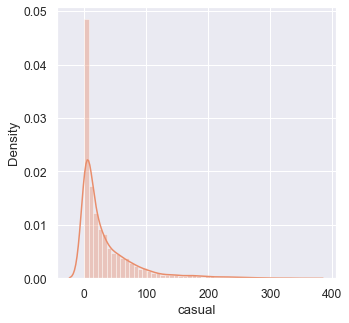

In [2602]:
sns.distplot(x_train_num['casual'])

In [2603]:
maxw = des['75%'] + (1.5 * (des['75%'] - des['25%']))
maxw.values[0]

114.0

In [2604]:
x_train_num['casual'].loc[Detect_Outlier(x_train_num , 'casual')] = x_train_num['casual'].median()

In [2605]:
len(Detect_Outlier(x_train_num , 'casual'))

486

In [2606]:
x_train_num['casual'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
casual,8551.0,24.293767,26.755707,0.0,4.0,16.0,35.0,114.0


<AxesSubplot:xlabel='casual', ylabel='Count'>

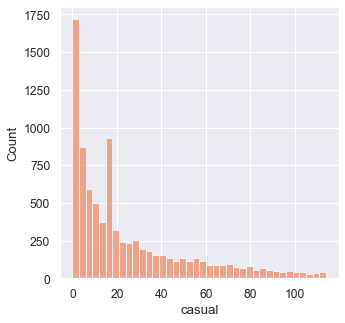

In [2607]:
sns.histplot(x_train_num['casual'])

<AxesSubplot:xlabel='casual'>

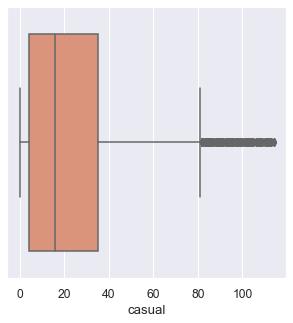

In [2608]:
sns.boxplot(data = x_train_num , x = 'casual')

###### registered:

In [2609]:
des = x_train_num['registered'].describe().to_frame().T
des

,count,mean,std,min,25%,50%,75%,max
registered,8551.0,156.19144,152.26016,0.0,35.0,118.0,223.0,857.0


<AxesSubplot:xlabel='registered', ylabel='Count'>

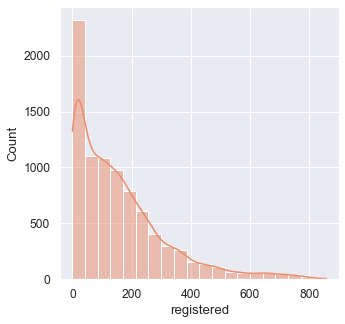

In [2610]:
sns.histplot(x_train_num['registered'] , bins = 20 , kde = True , )

<AxesSubplot:xlabel='registered'>

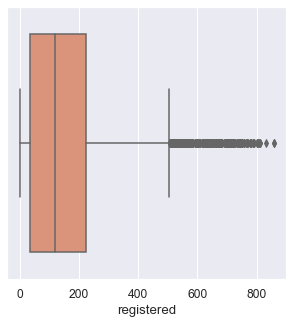

In [2611]:
sns.boxplot(x_train_num['registered'])

In [2612]:
len(Detect_Outlier(x_train_num , 'registered'))

334

In [2613]:
x_train_num['registered'].loc[Detect_Outlier(x_train_num , 'registered')] = x_train_num['registered'].median()

<AxesSubplot:xlabel='registered'>

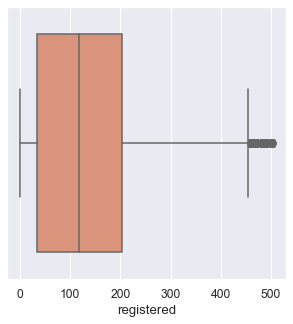

In [2614]:
sns.boxplot(x_train_num['registered'])

###### rented_bikes_count

In [2615]:
des = x_train_num['rented_bikes_count'].describe().to_frame().T
des

,count,mean,std,min,25%,50%,75%,max
rented_bikes_count,8551.0,191.671734,181.560427,1.0,41.0,144.0,284.0,970.0


<AxesSubplot:xlabel='rented_bikes_count'>

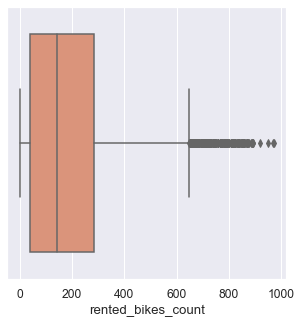

In [2616]:
sns.boxplot(x_train_num['rented_bikes_count'])

In [2617]:
x_train_num['rented_bikes_count'].loc[Detect_Outlier(x_train_num , 'rented_bikes_count')] = x_train_num['rented_bikes_count'].median()

<AxesSubplot:xlabel='rented_bikes_count'>

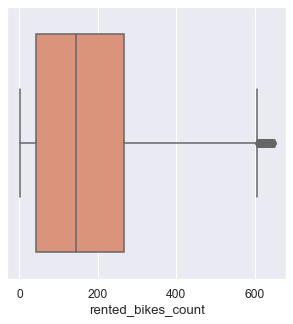

In [2618]:
sns.boxplot(x_train_num['rented_bikes_count'])

###### Profit

In [2619]:
des = x_train_num['Profit'].describe().to_frame().T
des

,count,mean,std,min,25%,50%,75%,max
Profit,8551.0,1281.713026,1297.923253,4.128767,244.928767,881.328767,1904.728767,7795.728767


<AxesSubplot:xlabel='Profit'>

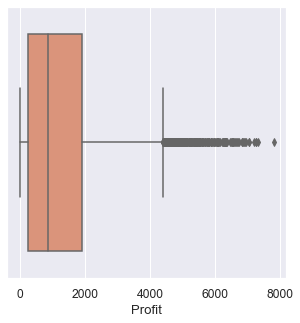

In [2620]:
sns.boxplot(x_train_num['Profit'])

In [2621]:
x_train_num['Profit'].loc[Detect_Outlier(x_train_num , 'Profit')] = x_train_num['Profit'].median()

<AxesSubplot:xlabel='Profit'>

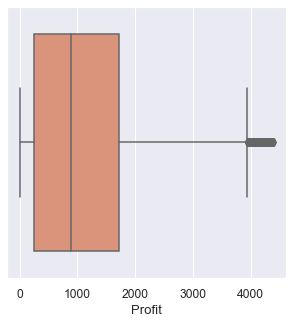

In [2622]:
sns.boxplot(x_train_num['Profit'])

In [2623]:
x_train_num.head(2)

,temp,humidity,windspeed,casual,registered,rented_bikes_count,Year,Profit
0,12.30,34.2,26.0027,5.0,69.0,74.0,2012.0,382.528767
1,13.12,66.0,8.9981,10.0,10.0,20.0,2012.0,214.828767


In [2624]:
x_train_cat.head(2)

,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,Day_0,Day_1,Day_2,Month_0,Month_1,Month_2,Month_3,DayPeriod_evening,DayPeriod_morning
0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,1,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0.0,1.0


In [2625]:
#x_train.to_csv('train.csv' , index = False)

In [2626]:
y_train = x_train_num['Profit']
x_train = pd.concat([x_train_cat , x_train_num] , axis = 1)
x_train.drop(['Profit'] , inplace = True , axis = 1)

In [2627]:
x_train.head()

,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,Day_0,Day_1,Day_2,Month_0,...,Month_3,DayPeriod_evening,DayPeriod_morning,temp,humidity,windspeed,casual,registered,rented_bikes_count,Year
0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,...,1,1.0,0.0,12.30,34.2,26.0027,5.0,69.0,74.0,2012.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,...,0,0.0,1.0,13.12,66.0,8.9981,10.0,10.0,20.0,2012.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,...,1,0.0,1.0,17.22,41.0,19.9995,0.0,5.0,5.0,2012.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,1.0,0.0,22.14,42.0,23.9994,16.0,345.0,361.0,2012.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0,1,1,0,...,1,1.0,0.0,21.32,62.4,7.0015,78.0,124.0,202.0,2011.0


##### X_test :

In [2628]:
Year = x_test_num['Year']
x_test_num.drop(['Year'] , axis = 1 , inplace = True)

temp   0
humidity   5
windspeed   74
casual   148
registered   72
rented_bikes_count   66
Profit   104


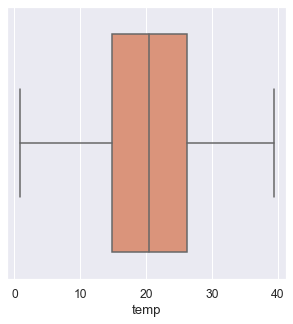

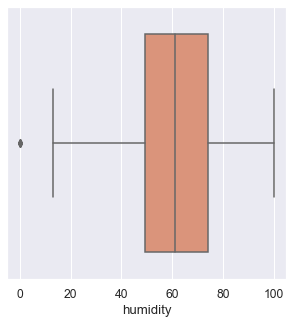

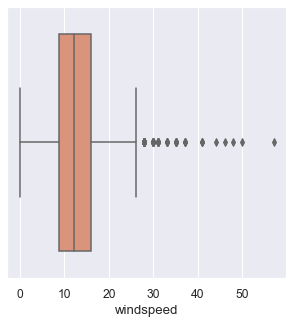

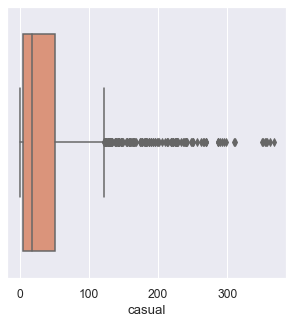

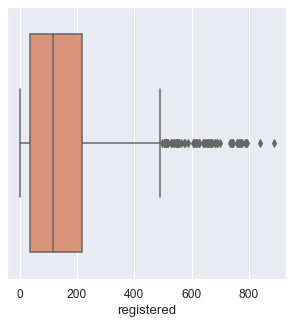

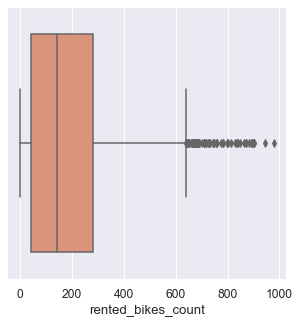

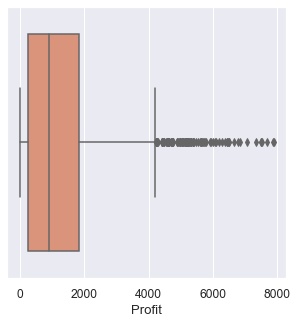

<Figure size 360x360 with 0 Axes>

In [2629]:
for i in x_test_num.columns:
    print(f'{i}   {len(Detect_Outlier(x_test_num , i))}')
    sns.boxplot(x_test_num[i])
    plt.figure()

In [2630]:
for i in x_test_num.columns:
    x_test_num[i].loc[Detect_Outlier(x_test_num , i)] = np.nan

In [2631]:
x_test_num.isnull().mean()*100

temp                  0.000000
humidity              0.235738
windspeed             3.488920
casual                6.977841
registered            3.394625
rented_bikes_count    3.111740
Profit                4.903347
dtype: float64

In [2632]:
knn_imputer = KNNImputer()

In [2633]:
x_test_num = pd.DataFrame(knn_imputer.fit_transform(x_test_num) , columns = knn_imputer.get_feature_names_out())

temp   0
humidity   0
windspeed   21
casual   7
registered   0
rented_bikes_count   0
Profit   1


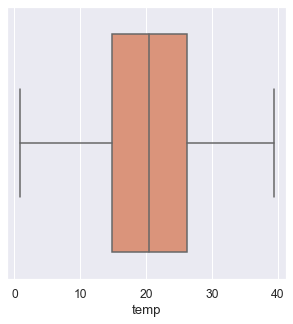

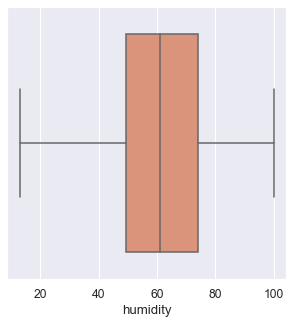

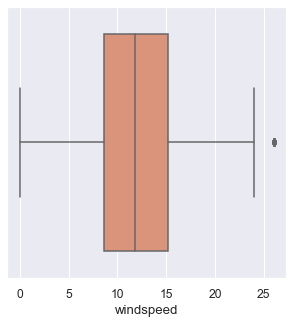

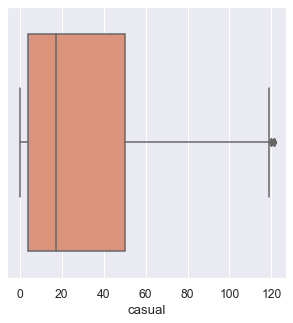

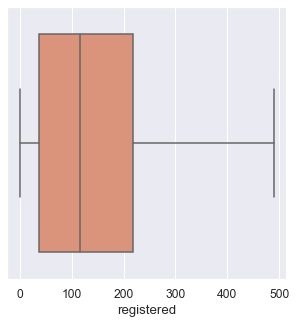

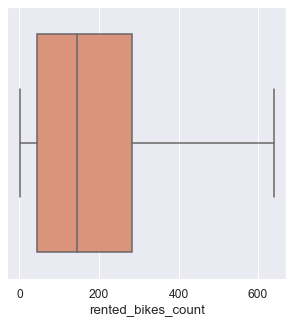

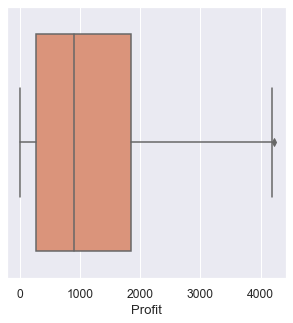

<Figure size 360x360 with 0 Axes>

In [2634]:
for i in x_test_num.columns:
    print(f'{i}   {len(Detect_Outlier(x_test_num , i))}')
    sns.boxplot(x_test_num[i])
    plt.figure()

In [2635]:
x_test_num['Year'] = Year

In [2636]:
x_test_num.head()

,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,Year
0,27.060,47.4,10.00042,45.0,240.0,285.0,1805.828767,2011.0
1,15.908,41.0,16.59992,9.0,129.0,138.0,709.328767,2012.0
2,27.060,65.0,12.99800,34.0,150.0,184.0,1229.628767,2011.0
3,16.400,76.0,7.40082,2.0,22.0,24.0,128.828767,2012.0
4,28.700,65.0,8.99810,27.0,126.0,153.0,1006.028767,2011.0


In [2637]:
x_test = pd.concat([x_test_cat , x_test_num] , axis = 1)

In [2638]:
#x_test.to_csv('test.csv' , index = False)

In [2639]:
y_test = x_test['Profit']
x_test.drop(['Profit'] , axis = 1 , inplace = True)

In [2640]:
x_test.head(2)

,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,Day_0,Day_1,Day_2,Month_0,Month_1,...,Month_3,DayPeriod_evening,DayPeriod_morning,temp,humidity,windspeed,casual,registered,rented_bikes_count,Year
0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,...,1,1.0,0.0,27.060,47.4,10.00042,45.0,240.0,285.0,2011.0
1,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,...,0,0.0,1.0,15.908,41.0,16.59992,9.0,129.0,138.0,2012.0
